<a href="https://colab.research.google.com/github/Lavakumar14/DPA/blob/main/FinalProject_DPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy pandas scikit-learn skl2onnx onnx onnxruntime openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import os

# Load the dataset
file_path = "/content/data_public.csv"

# Check if the file exists
if os.path.exists(file_path):
    data = pd.read_csv(file_path)

    # Display dataset info and preview
    print(data.info())
    print(data.head())
else:
    print(f"Error: File not found at {file_path}")
    print("Please check the file path and try again.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338136 entries, 0 to 338135
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       338136 non-null  float64
 1   B       338136 non-null  float64
 2   C       338136 non-null  float64
 3   D       338136 non-null  float64
 4   E       338136 non-null  float64
 5   F       338136 non-null  float64
 6   G       338136 non-null  float64
 7   H       338136 non-null  float64
 8   I       338135 non-null  float64
 9   J       338135 non-null  float64
 10  K       338135 non-null  float64
 11  L       338135 non-null  float64
 12  M       338135 non-null  float64
 13  N       338135 non-null  float64
 14  O       338135 non-null  float64
 15  Class   338135 non-null  float64
dtypes: float64(16)
memory usage: 41.3 MB
None
            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047186  76.904999   
1  -38.019

Data Summary Statistics:
                   A              B              C              D  \
count  465633.000000  465633.000000  465633.000000  465633.000000   
mean       50.349734     -18.873801      71.342713     -13.618793   
std       129.138734      14.495717     105.220242      46.985968   
min       -73.089401     -83.223570     -58.621708    -137.581849   
25%       -37.957493     -17.892534       7.515042     -14.725253   
50%       -32.001869     -13.708746      13.451103      10.022375   
75%       227.942997     -10.570229     212.269049      19.555770   
max       268.773840       4.460108     252.925156      32.637993   

                   E              F              G              H  \
count  465633.000000  465633.000000  465633.000000  465633.000000   
mean       29.263790      -6.394660      31.558492      50.881338   
std        72.751868      73.103898      66.577921     103.311642   
min       -38.298257    -148.591728     -65.018947     -41.459135   
25%     

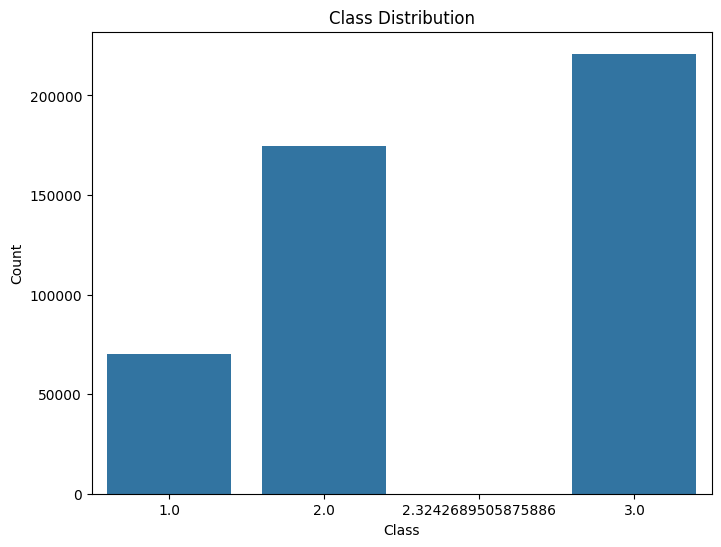

In [7]:
import pandas as pd
import seaborn as sns  # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib


# Load dataset
file_path = "/content/data_public.csv"
data = pd.read_csv(file_path)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Data summary statistics
print("Data Summary Statistics:")
print(data.describe())

# Visualization of class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=data["Class"])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


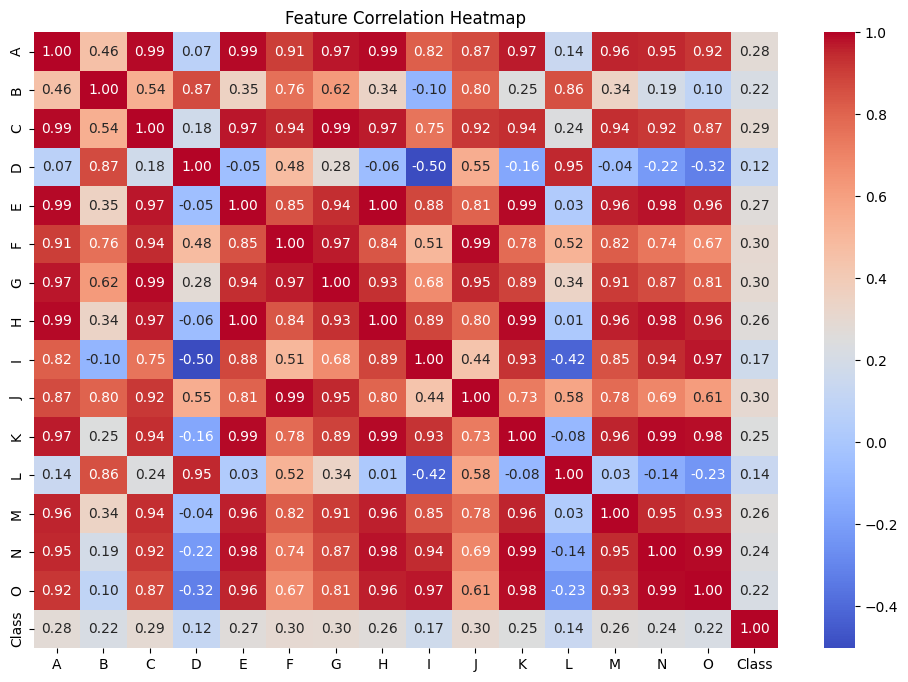

In [8]:
# Heatmap for feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = data.drop(columns=["Class"])
y = data["Class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Ensure the target variable contains integers (discrete classes)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))  # Random Forest with parallelization
])

# Define hyperparameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [100],       # Number of trees
    'classifier__max_depth': [10, None],     # Tree depth
    'classifier__max_features': ['sqrt'] # Features considered at each split
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Test 10 random combinations
    cv=3,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_pipeline = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print best parameters
print("\nBest Hyperparameters:")
print(random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.38      0.43     14036
           2       0.75      1.00      0.86     34905
           3       0.76      0.61      0.68     44186

    accuracy                           0.72     93127
   macro avg       0.67      0.67      0.66     93127
weighted avg       0.72      0.72      0.71     93127


Best Hyperparameters:
{'classifier__n_estimators': 100, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}


<ipython-input-11-67a4fdc9250d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


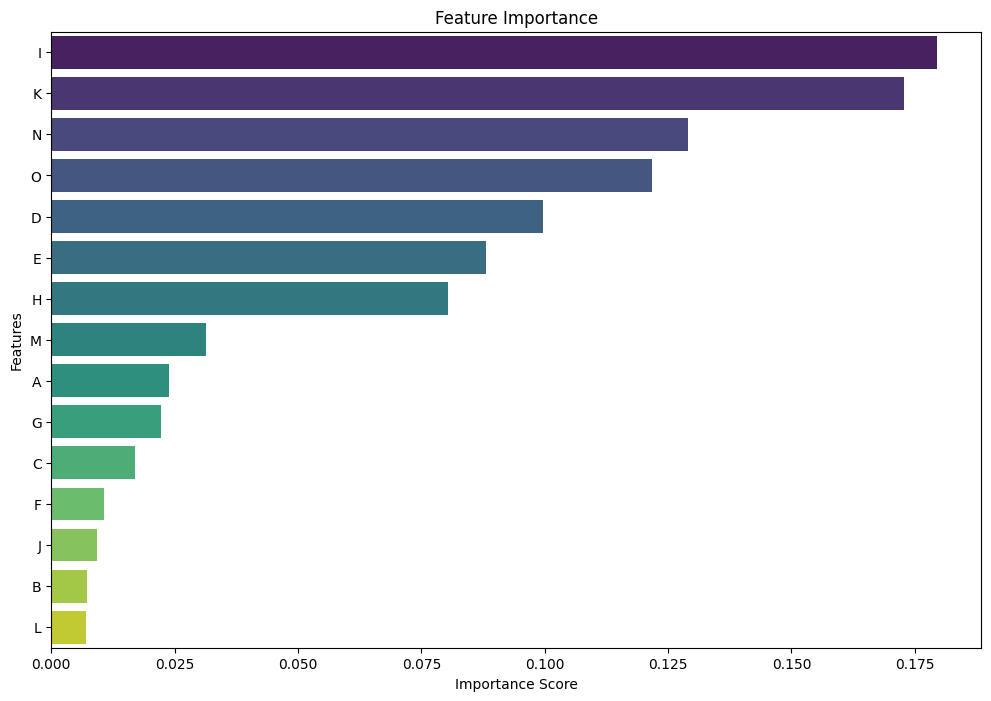

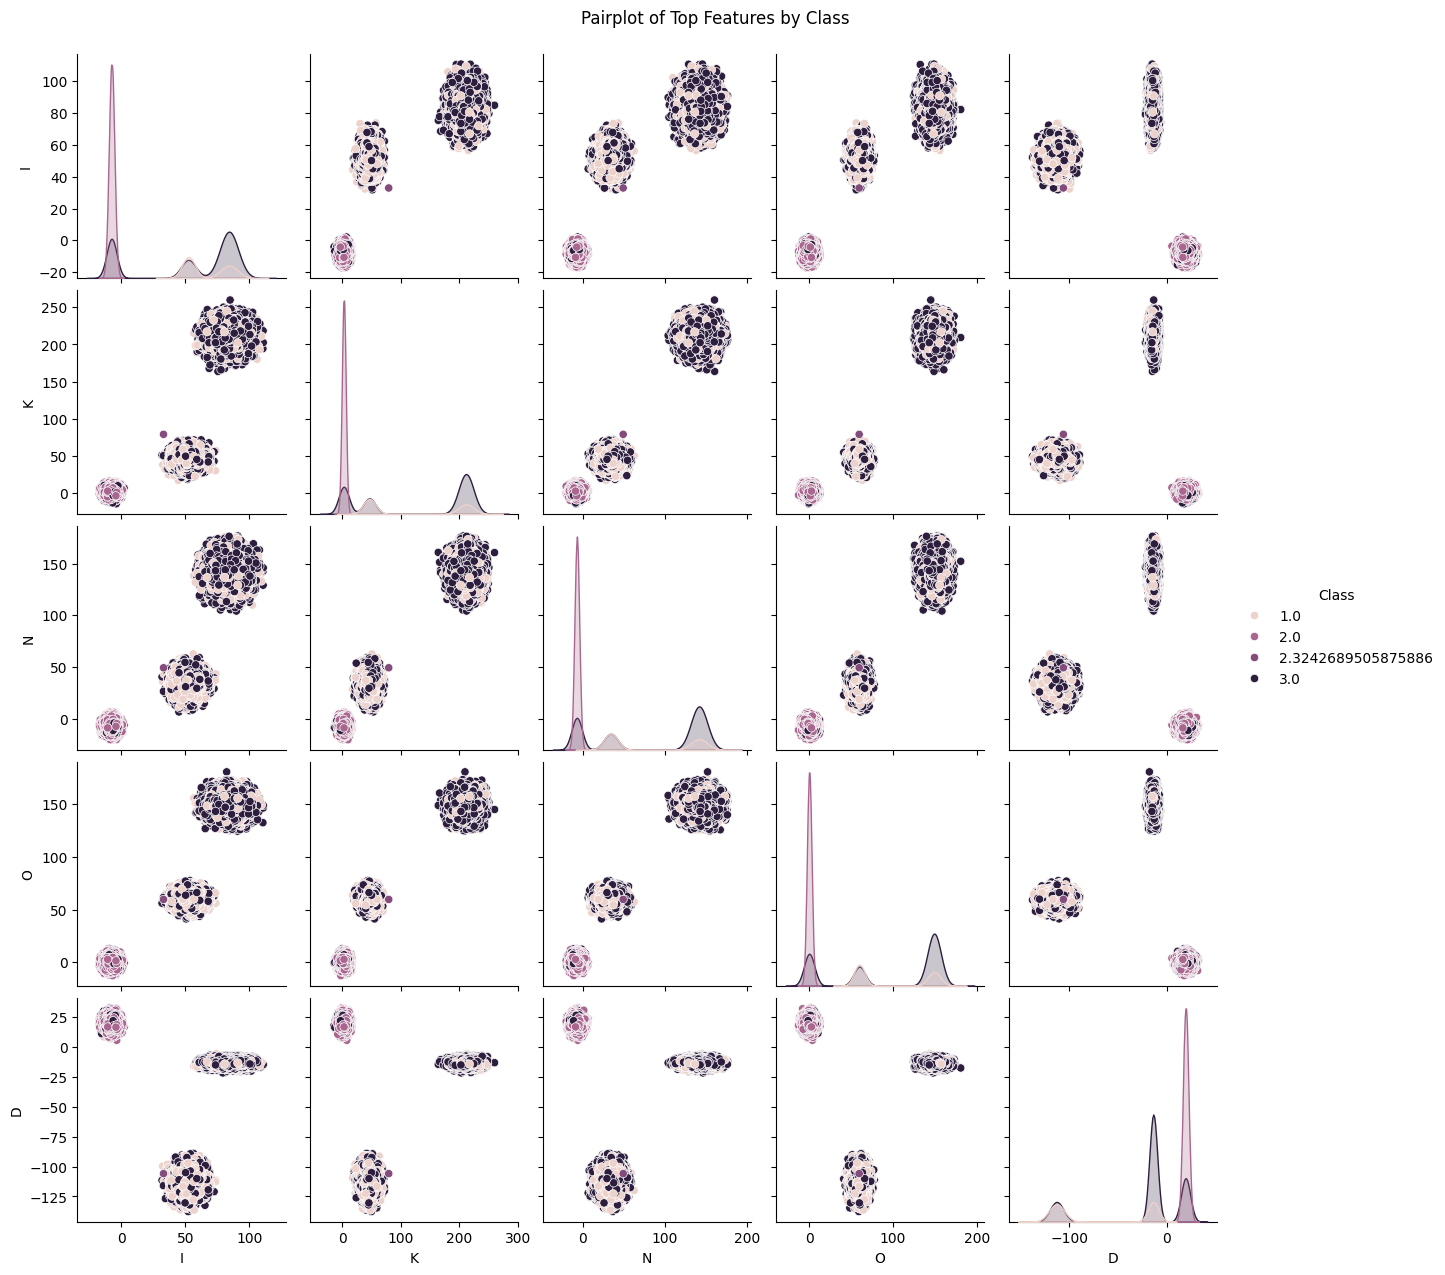

In [11]:
# Feature importance visualization
rf_model = best_pipeline.named_steps['classifier']
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Bar chart for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# Pairplot for EDA
top_features = feature_importance_df['Feature'][:5].tolist()  # Select top 5 important features
sns.pairplot(data[top_features + ['Class']], hue="Class", diag_kind="kde")
plt.suptitle("Pairplot of Top Features by Class", y=1.02)
plt.show()

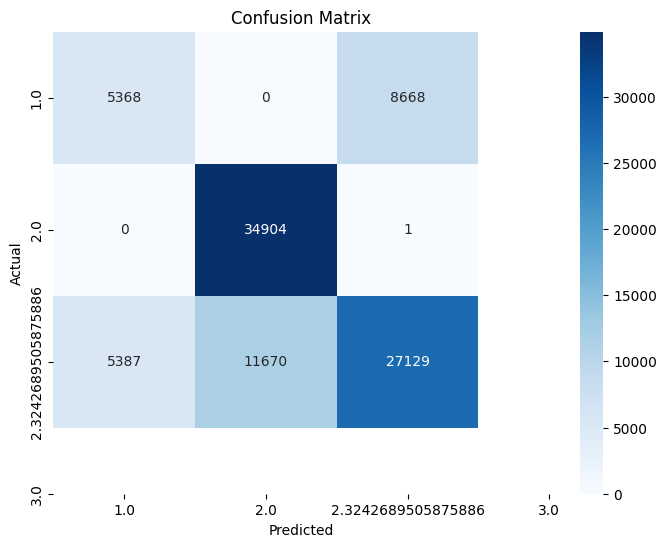

In [12]:
import numpy as np  # Import numpy
from sklearn.metrics import confusion_matrix

# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [13]:
!pip install onnxconverter-common
!pip install skl2onnx

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType  # Import FloatTensorType
import onnxruntime as rt
from sklearn.metrics import classification_report

# Evaluate model
y_pred = best_pipeline.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert to ONNX
print("Converting pipeline to ONNX format...")
input_features = [(name, FloatTensorType([None, 1])) for name in X.columns]
onnx_model = convert_sklearn(best_pipeline, initial_types=input_features, options={id(best_pipeline.named_steps['classifier']): {'zipmap': False}})

# Save ONNX model
onnx_model_path = "model_pipeline.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())
print(f"ONNX model saved at {onnx_model_path}")

# Load ONNX model for inference
print("Loading ONNX model for inference...")
session = rt.InferenceSession(onnx_model_path)

# Prepare test data for ONNX
onnx_inputs = {name: X_test[name].values.astype(np.float32).reshape(-1, 1) for name in X.columns}

# Run predictions using ONNX runtime
print("Running predictions using ONNX runtime...")
onnx_outputs = session.run(None, onnx_inputs)  # Ensure this runs without errors

# Extract probabilities and compute labels
if len(onnx_outputs) > 0:
    output_probabilities = onnx_outputs[0]  # Assuming the first output contains probabilities
    print(f"ONNX raw output shape: {output_probabilities.shape}")

    # Check if probabilities or raw labels
    if output_probabilities.ndim > 1:
        # If probabilities are provided, calculate labels
        output_labels = np.argmax(output_probabilities, axis=1) + 1  # Adjust index to match class labels
    else:
        # Raw labels are directly provided
        output_labels = output_probabilities.astype(int)
else:
    print("Error: ONNX output is empty.")
    output_probabilities = None
    output_labels = None

# Print probabilities and labels
if output_probabilities is not None:
    print("\nOutput Probabilities (First 10):")
    print(output_probabilities[:10])

if output_labels is not None:
    print("\nOutput Labels (First 10):")
    print(output_labels[:10])

# Evaluate ONNX predictions (if labels exist)
if output_labels is not None:
    print("\nONNX Model Predictions:")
    print(classification_report(y_test, output_labels))
else:
    print("No valid ONNX predictions to evaluate.")



Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.38      0.43     14036
           2       0.75      1.00      0.86     34905
           3       0.76      0.61      0.68     44186

    accuracy                           0.72     93127
   macro avg       0.67      0.67      0.66     93127
weighted avg       0.72      0.72      0.71     93127

Converting pipeline to ONNX format...
ONNX model saved at model_pipeline.onnx
Loading ONNX model for inference...
Running predictions using ONNX runtime...
ONNX raw output shape: (93127,)

Output Probabilities (First 10):
[3 2 2 1 2 1 3 3 2 2]

Output Labels (First 10):
[3 2 2 1 2 1 3 3 2 2]

ONNX Model Predictions:
              precision    recall  f1-score   support

           1       0.50      0.38      0.43     14036
           2       0.75      1.00      0.86     34905
           3       0.76      0.61      0.68     44186

    accuracy                           0.72     93127
   ma

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.9 MB/s eta 0:00:00


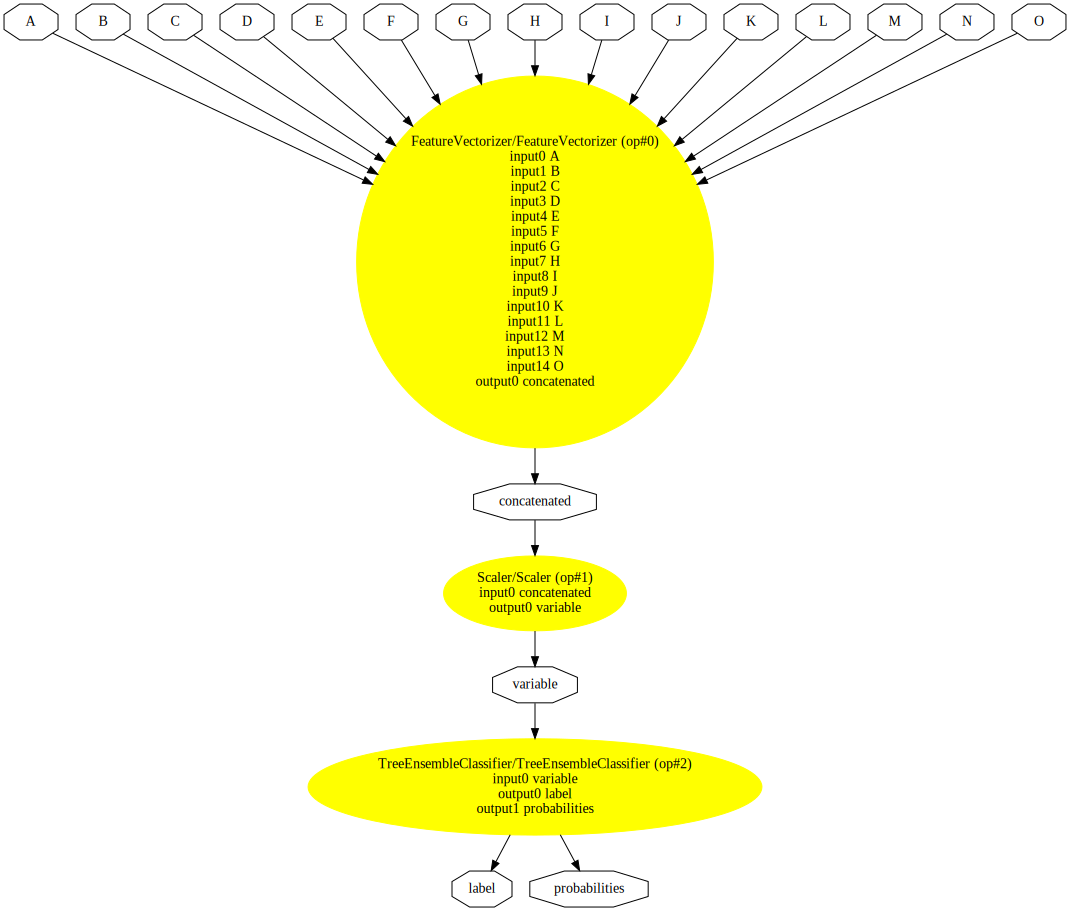

In [14]:
!pip install pydot graphviz
!pip install onnx
import onnx
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import graphviz

# Load the ONNX model
onnx_model_path = "model_pipeline.onnx"
model_onnx = onnx.load(onnx_model_path)

# Generate a visualization graph
pydot_graph = GetPydotGraph(
    model_onnx.graph,
    name=model_onnx.graph.name,
    rankdir="TB",  # Top-to-Bottom layout
    node_producer=GetOpNodeProducer("docstring", color="yellow", fillcolor="yellow", style="filled")
)

# Render the graph using graphviz
graphviz.Source(pydot_graph.to_string())


In [15]:
pip install --upgrade scikit-learn skl2onnx

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import skl2onnx
from skl2onnx.common.data_types import FloatTensorType

# Define a pipeline with preprocessing and a Logistic Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Convert the trained pipeline to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = skl2onnx.convert_sklearn(pipeline, initial_types=initial_type)

# Save the ONNX model to a file
onnx_file_path = "pipeline.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model successfully converted and saved to {onnx_file_path}")

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.30      0.37     14036
           2       0.75      1.00      0.86     34905
           3       0.74      0.64      0.69     44186

    accuracy                           0.73     93127
   macro avg       0.67      0.65      0.64     93127
weighted avg       0.71      0.73      0.70     93127

Model successfully converted and saved to pipeline.onnx


In [17]:
from google.colab import files
files.download("pipeline.onnx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!pip install onnx

In [20]:
import onnx

# Replace 'pipeline.onnx' with your actual file path
file_path = "pipeline.onnx"

try:
    # Load the ONNX model
    model = onnx.load(file_path)

    # Check if the model is valid
    onnx.checker.check_model(model)
    print("The ONNX model is valid.")

    # Print model graph structure
    print("Model Graph:")
    print(onnx.helper.printable_graph(model.graph))
except Exception as e:
    print("Error validating the ONNX model:", str(e))

The ONNX model is valid.
Model Graph:
graph 6e5435114b81453ba588c5e70e067a54 (
  %float_input[FLOAT, ?x15]
) {
  %variable = Scaler[offset = [50.4249229431152, -18.863317489624, 71.4040603637695, -13.5939607620239, 29.2932014465332, -6.34440946578979, 31.5976505279541, 50.9277229309082, 32.9422302246094, 40.7811546325684, 79.2086944580078, -6.76066064834595, -42.3591575622559, 49.3639450073242, 59.691967010498], scale = [0.0077427732758224, 0.0690427795052528, 0.00950414128601551, 0.0212957318872213, 0.0137426638975739, 0.013681685552001, 0.0150200519710779, 0.00967809278517962, 0.0237258467823267, 0.0129904709756374, 0.0105534261092544, 0.0641300603747368, 0.0558629147708416, 0.0148733239620924, 0.0149843189865351]](%float_input)
  %label, %probability_tensor = LinearClassifier[classlabels_ints = [1, 2, 3], coefficients = [0.317319363355637, -0.059233769774437, -0.0896921828389168, -1.06470692157745, 0.502117931842804, -0.312449961900711, -0.093650609254837, 0.4247145652771, 0.4425280